In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
df_lap = pd.read_csv('laptop_price.csv')

In [4]:
df_lap.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df_lap.shape

(1303, 13)

In [6]:
df_lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


#### Summary

- Dataset contains 1303 entries and 13 variables.
- Both numerical and categorical are present.
- Numerical are of datatype int64 and float64, Categorical are of object.
- No missing values are present.
- Price_euros is the target variable

In [7]:
df_lap.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
# Droping laptop_ID
df_lap.drop(['laptop_ID'], axis=1, inplace = True)

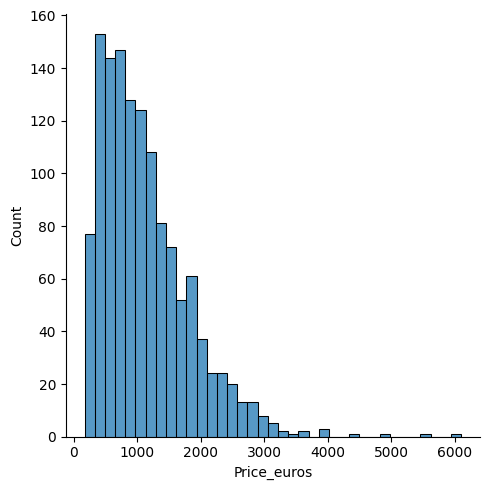

In [9]:
# Visualizing the distribution of target variable
sns.displot(df_lap['Price_euros'])

##### Insights:

- The distribution shows a positive skewness.
- Its look like almost all the cars are less than 2000

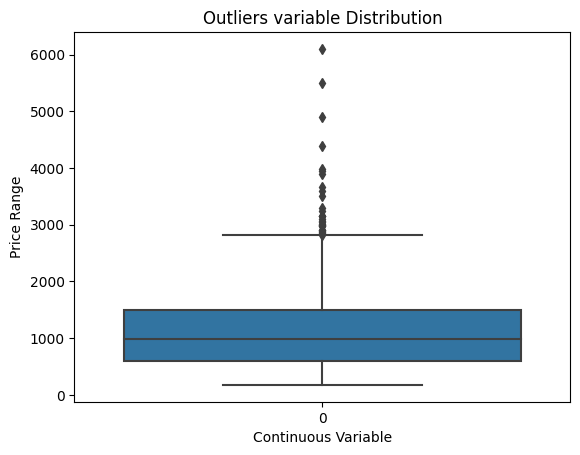

In [10]:
# Outlier analysis of target variable
sns.boxplot(data = df_lap.Price_euros, orient='v')
plt.title('Outliers variable Distribution')
plt.ylabel('Price Range')
plt.xlabel('Continuous Variable')
plt.show()

##### Insights:
- There are some price ranges above 2900 which can be termed as outliers but they lets not remove it rather we will use standardization scaling.

### Univariate analysis

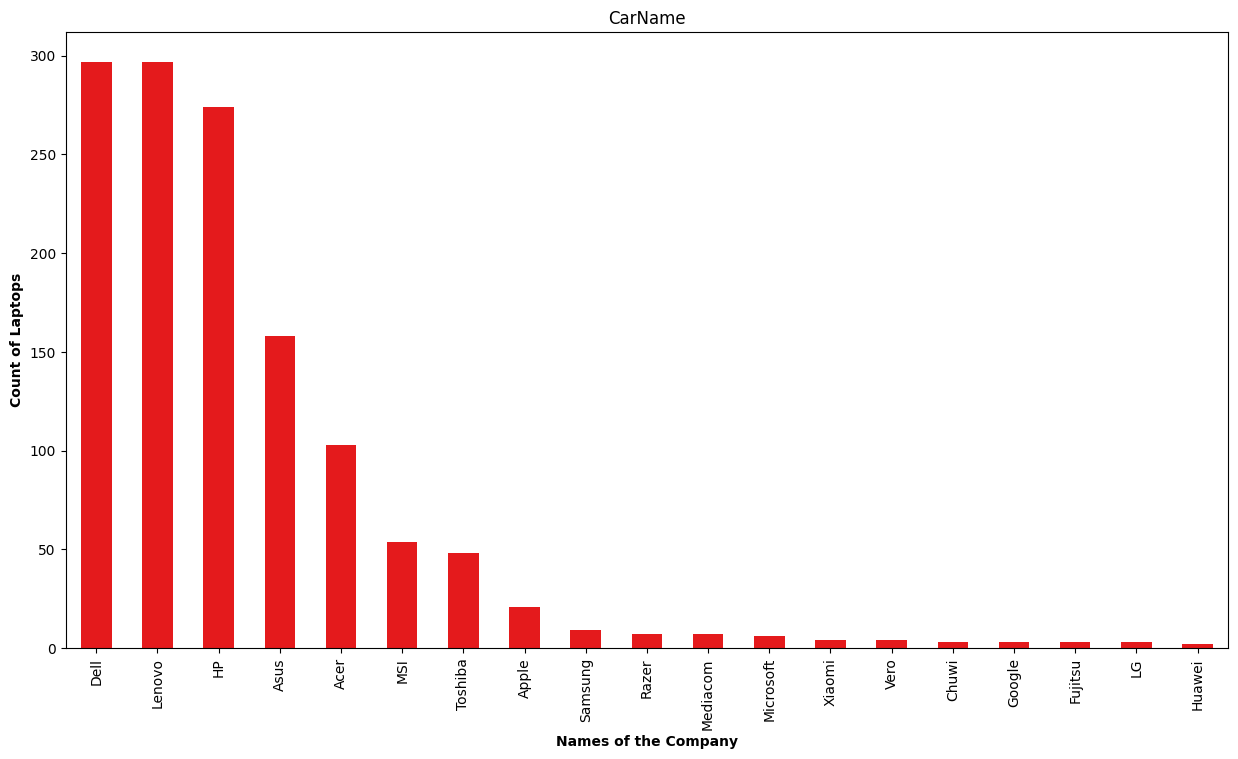

In [11]:
# Visualizing the different Laptop brands available

plt.rcParams['figure.figsize'] = [15,8]
ax=df_lap['Company'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Company",fontweight = 'bold')
plt.ylabel("Count of Laptops",fontweight = 'bold')
plt.show()

#### Insights:
- Dell and Lenovo seems to be the most favourited brands.
- Huawei seems to be the least favourited

[Text(0.5, 0, 'Memory'), Text(0, 0.5, 'Frequency of Car Body')]

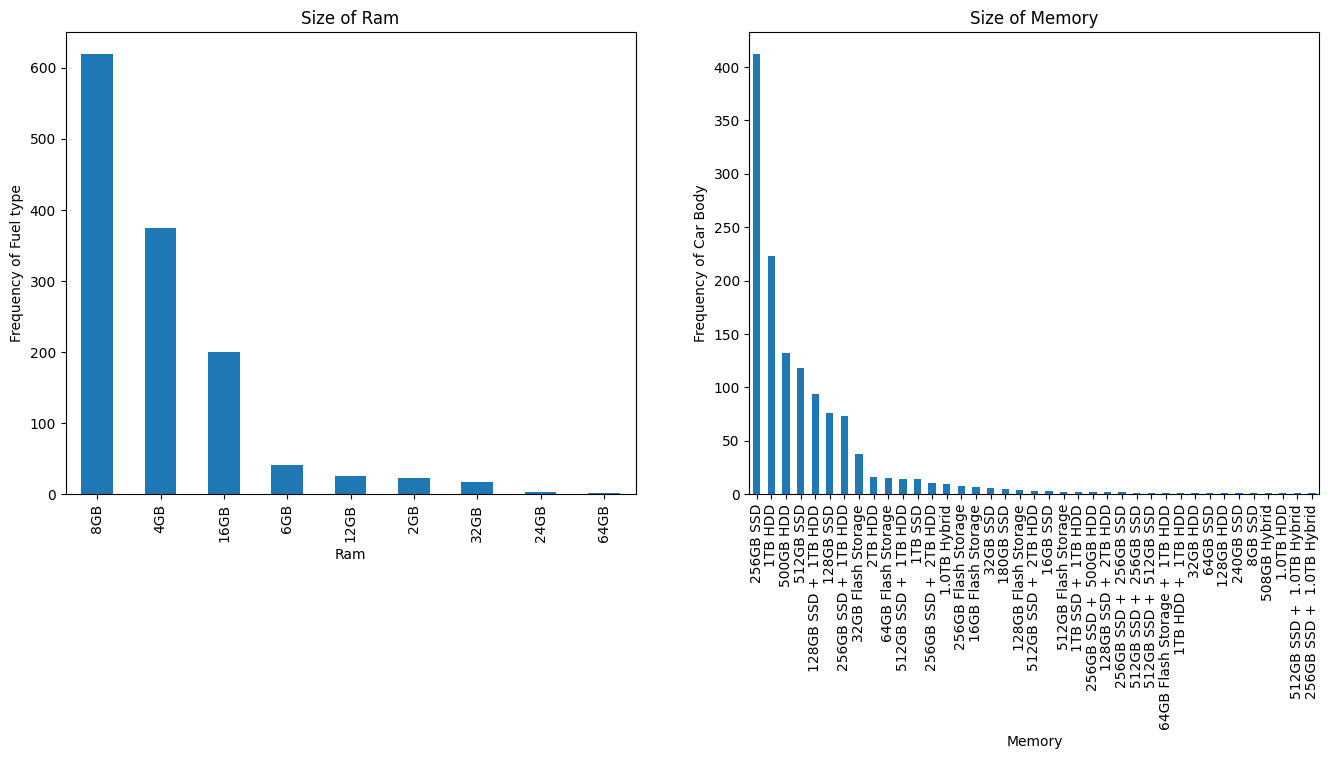

In [12]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,2)
plt1 = df_lap['Ram'].value_counts().plot(kind='bar')
plt.title('Size of Ram')
plt1.set(xlabel = 'Ram', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df_lap['Memory'].value_counts().plot(kind='bar')
plt.title('Size of Memory')
plt1.set(xlabel = 'Memory', ylabel='Frequency of Car Body')

#### Insight:

- Size of ram used in most of the laptops is 8GB
- Most prefered Memory is 256GB SSDm


#### Bivariate analysis

In [13]:
df_lap.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

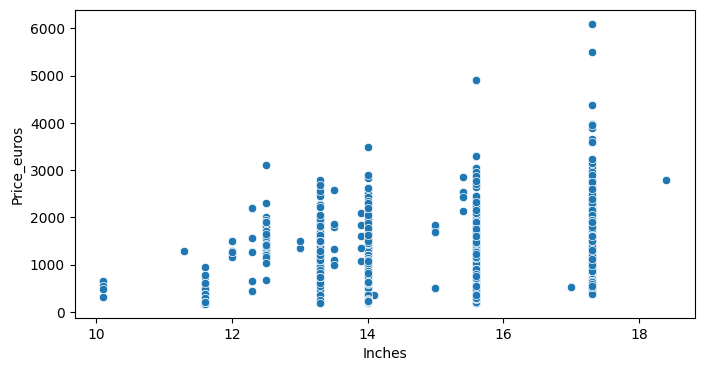

In [14]:
# Relationship between Inches and Price_euros
plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'Inches', y = 'Price_euros', data = df_lap)
plt.show()

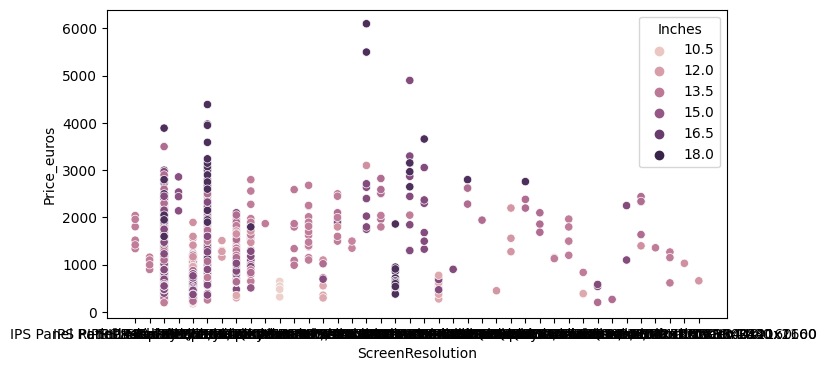

In [15]:
# Relationship between ScreenResolution and Price_euros
plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'ScreenResolution', y = 'Price_euros', hue='Inches', data = df_lap)
plt.show()

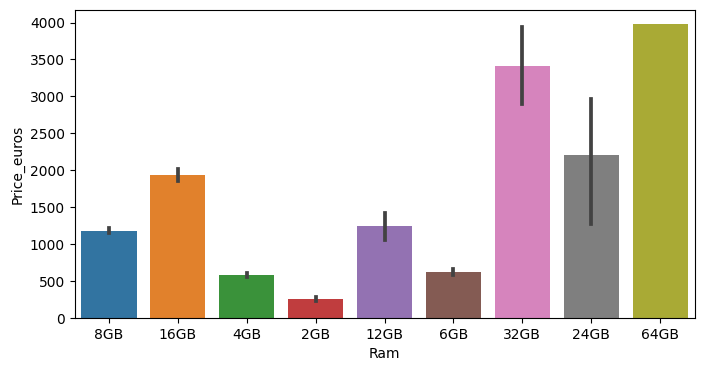

In [16]:
# Relationship between Ram and Price_euros
plt.figure(figsize = (8, 4))
sns.barplot(x = 'Ram', y = 'Price_euros', data = df_lap)
plt.show()

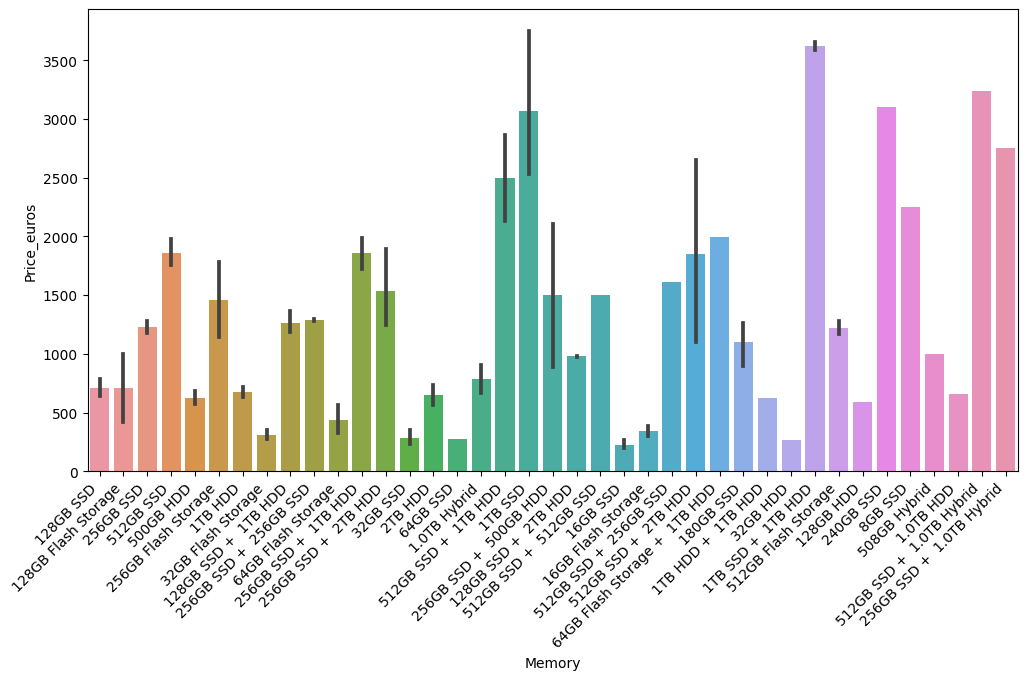

In [17]:
# Relationship between Memory and Price_euros
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_lap, x='Memory', y='Price_euros', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Figure size 800x400 with 0 Axes>

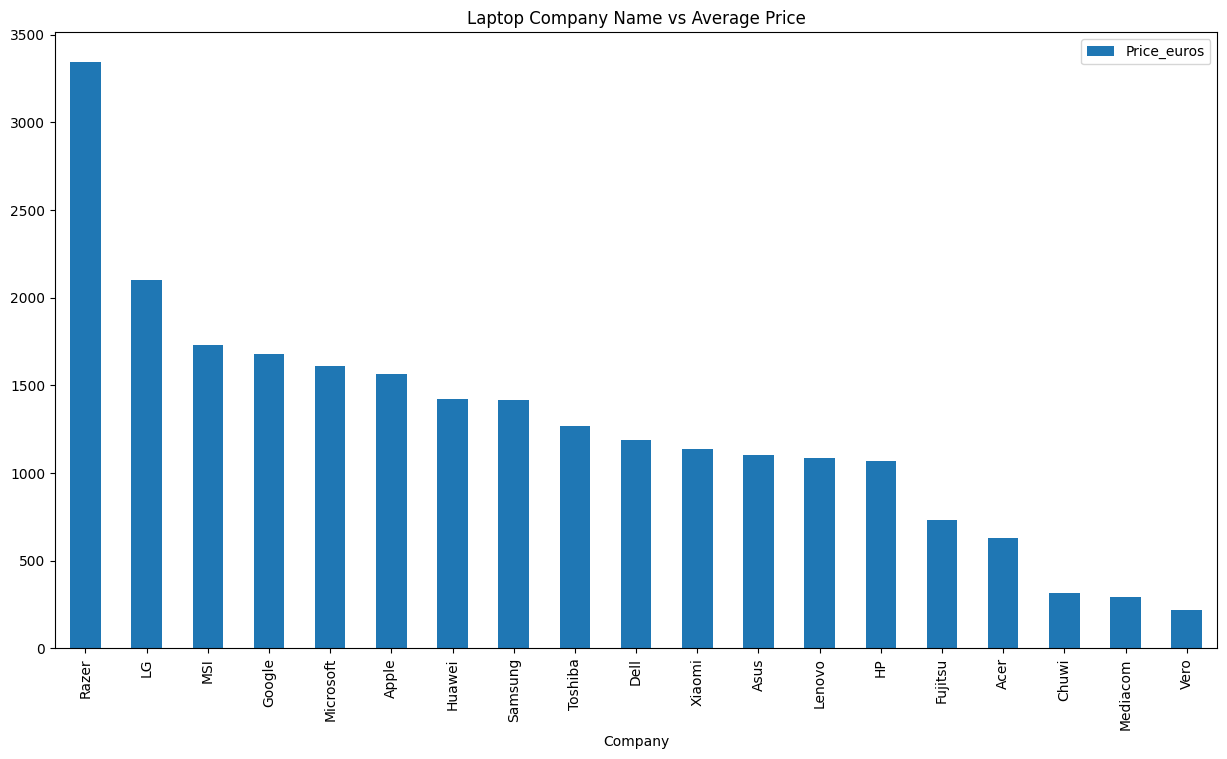

In [18]:
# Average price according to Company
plt.figure(figsize=(8, 4))

df_autox = pd.DataFrame(df_lap.groupby(['Company'])['Price_euros'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Laptop Company Name vs Average Price')
plt.show()

#### Insights:

- Razer has the highest followed by LG.

##### Analysing Numerical variables

In [19]:
numeric = df_lap.select_dtypes(include = ['int64', 'float64'])

In [20]:
numeric_cols = numeric.columns[0]

In [21]:
numeric_cols

'Inches'

Text(0, 0.5, 'Inches')

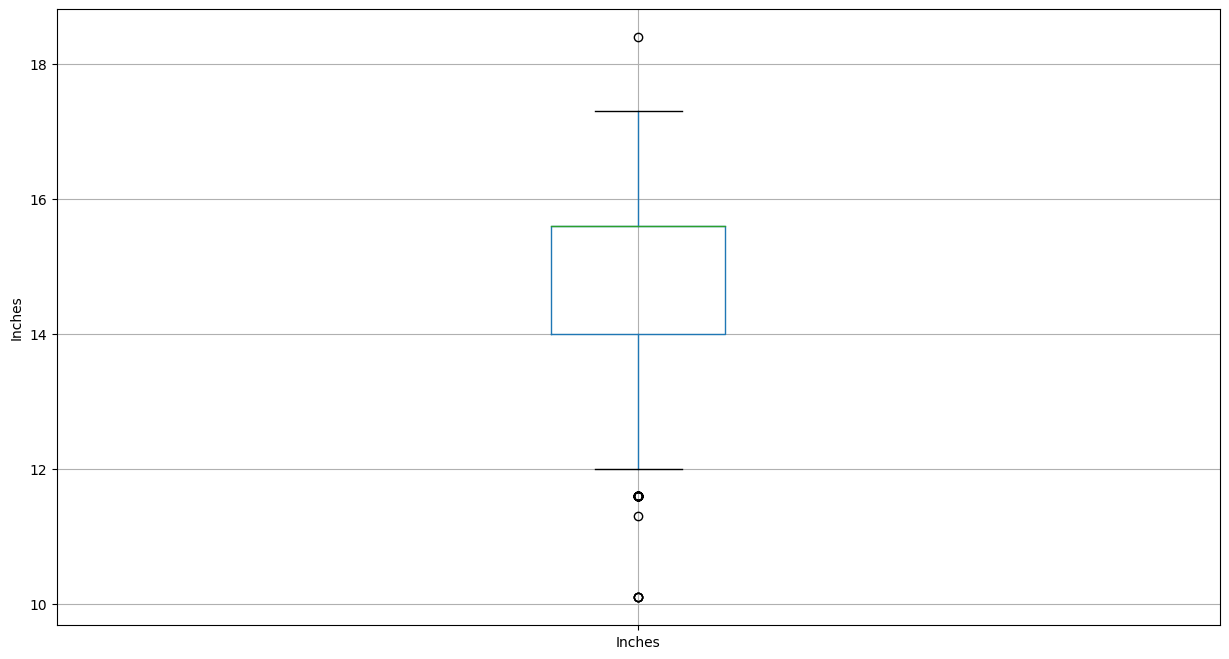

In [22]:
# Checking outliers in Inches

fig = df_lap.boxplot(column= 'Inches')
fig.set_title('')
fig.set_ylabel('Inches')

<AxesSubplot: xlabel='Inches', ylabel='Count'>

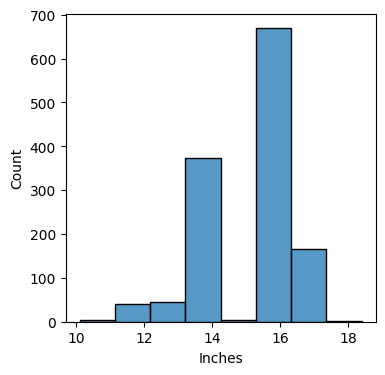

In [23]:
# Checking the distribution

plt.tight_layout(pad=2)
fig = plt.gcf()
fig.set_size_inches(4, 4)
sns.histplot(data=df_lap, x= 'Inches', bins=8)

<AxesSubplot: >

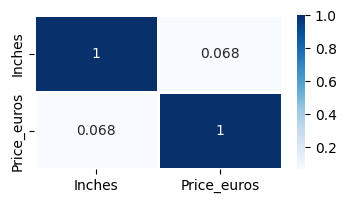

In [24]:
# Correlation
plt.figure(figsize=(4,2))
corr = df_lap.corr(numeric_only = True).abs()
sns.heatmap(corr, annot=True, cmap='Blues', linewidth=1)

#### Insights:

- Only One Numerical variable
- There are some outliers
- Very weak correlation with Price_euros

#### Analysing categorical variable

In [25]:
categorical_cols = [feature for feature in df_lap.columns if df_lap[feature].dtype=='O']

In [26]:
len(categorical_cols)

10

In [27]:
df_lap[categorical_cols].columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [28]:
# check for cardinality in categorical variables

for var in categorical_cols:
    
    print(var, ' contains ', len(df_lap[var].unique()), ' labels')

Company  contains  19  labels
Product  contains  618  labels
TypeName  contains  6  labels
ScreenResolution  contains  40  labels
Cpu  contains  118  labels
Ram  contains  9  labels
Memory  contains  39  labels
Gpu  contains  110  labels
OpSys  contains  9  labels
Weight  contains  179  labels


#### Insights:

- Total 10 categorical variables.
- Product and Cpu have high cardinality


### Splitting the Data

In [29]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split
X = df_lap.drop(['Price_euros'], axis=1)
y = df_lap['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

### Feature Engineering

##### Dealing with Categorical variables

In [30]:
# check for cardinality again in categorical variables

for var in categorical_cols:
    
    print(var, ' contains ', len(df_lap[var].unique()), ' labels')

Company  contains  19  labels
Product  contains  618  labels
TypeName  contains  6  labels
ScreenResolution  contains  40  labels
Cpu  contains  118  labels
Ram  contains  9  labels
Memory  contains  39  labels
Gpu  contains  110  labels
OpSys  contains  9  labels
Weight  contains  179  labels


In [31]:
# let's find the top 10 most frequent categories for the variable Company

df_lap.Company.value_counts().sort_values(ascending=False).head(10)

Dell        297
Lenovo      297
HP          274
Asus        158
Acer        103
MSI          54
Toshiba      48
Apple        21
Samsung       9
Mediacom      7
Name: Company, dtype: int64

In [32]:
# get whole set of dummy variables, for all the categorical variables
    
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

for feature in df_lap[categorical_cols].columns:
    top_x_labels = [y for y in df_lap[feature].value_counts().sort_values(ascending=False).head(10).index]
    one_hot_encoding_top_x(X_train, feature, top_x_labels)
    one_hot_encoding_top_x(X_test, feature, top_x_labels)
     

In [33]:
X_train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Company_Dell,Company_Lenovo,Company_HP,Company_Asus,Company_Acer,Company_MSI,Company_Toshiba,Company_Apple,Company_Samsung,Company_Mediacom,Product_XPS 13,Product_Inspiron 3567,Product_250 G6,Product_Legion Y520-15IKBN,Product_Vostro 3568,Product_Inspiron 5570,Product_ProBook 450,Product_Alienware 17,Product_Inspiron 5567,Product_Satellite Pro,TypeName_Notebook,TypeName_Gaming,TypeName_Ultrabook,TypeName_2 in 1 Convertible,TypeName_Workstation,TypeName_Netbook,ScreenResolution_Full HD 1920x1080,ScreenResolution_1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_1600x900,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Cpu_Intel Core i5 7200U 2.5GHz,Cpu_Intel Core i7 7700HQ 2.8GHz,Cpu_Intel Core i7 7500U 2.7GHz,Cpu_Intel Core i7 8550U 1.8GHz,Cpu_Intel Core i5 8250U 1.6GHz,Cpu_Intel Core i5 6200U 2.3GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i7 6500U 2.5GHz,Cpu_Intel Core i7 6700HQ 2.6GHz,Cpu_Intel Core i3 7100U 2.4GHz,Ram_8GB,Ram_4GB,Ram_16GB,Ram_6GB,Ram_12GB,Ram_2GB,Ram_32GB,Ram_24GB,Ram_64GB,Memory_256GB SSD,Memory_1TB HDD,Memory_500GB HDD,Memory_512GB SSD,Memory_128GB SSD + 1TB HDD,Memory_128GB SSD,Memory_256GB SSD + 1TB HDD,Memory_32GB Flash Storage,Memory_2TB HDD,Memory_64GB Flash Storage,Gpu_Intel HD Graphics 620,Gpu_Intel HD Graphics 520,Gpu_Intel UHD Graphics 620,Gpu_Nvidia GeForce GTX 1050,Gpu_Nvidia GeForce GTX 1060,Gpu_Nvidia GeForce 940MX,Gpu_AMD Radeon 530,Gpu_Intel HD Graphics 500,Gpu_Intel HD Graphics 400,Gpu_Nvidia GeForce GTX 1070,OpSys_Windows 10,OpSys_No OS,OpSys_Linux,OpSys_Windows 7,OpSys_Chrome OS,OpSys_macOS,OpSys_Mac OS X,OpSys_Windows 10 S,OpSys_Android,Weight_2.2kg,Weight_2.1kg,Weight_2.4kg,Weight_2.3kg,Weight_2.5kg,Weight_2kg,Weight_2.8kg,Weight_1.2kg,Weight_1.86kg,Weight_2.04kg
850,HP,250 G6,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,128GB SSD,Intel HD Graphics 400,No OS,1.86kg,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
949,Acer,Chromebook 14,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68kg,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
339,Dell,Inspiron 7570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2kg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
322,Asus,ZenBook UX410UA-GV183T,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2kg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1236,HP,EliteBook 840,Ultrabook,14.0,2560x1440,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Droping the categorical features
for feature in df_lap[categorical_cols].columns:
    X_train.drop([feature], axis =1, inplace=True)
    X_test.drop([feature], axis =1, inplace=True)

##### Dealing with Numerical variables

In [35]:
# Dealing outliers with quantile based flooring and capping

tenth_percentile = np.percentile(df_lap['Inches'], 10)
ninetieth_percentile = np.percentile(df_lap['Inches'], 90)
print(tenth_percentile, ninetieth_percentile)
X_train['Inches'] = np.where(X_train['Inches']<tenth_percentile, tenth_percentile, X_train['Inches'])
X_train['Inches'] = np.where(X_train['Inches']>ninetieth_percentile, ninetieth_percentile, X_train['Inches'])
X_test['Inches'] = np.where(X_test['Inches']<tenth_percentile, tenth_percentile, X_test['Inches'])
X_test['Inches'] = np.where(X_test['Inches']>ninetieth_percentile, ninetieth_percentile, X_test['Inches'])

13.3 17.3


In [36]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [37]:
X_train_norm

array([[0.575, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.175, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.575, 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.575, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.575, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.575, 0.   , 1.   , ..., 0.   , 0.   , 0.   ]])

In [38]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Inches']
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [39]:
# training an lazzo model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import LassoCV

# lasso with out scaling features
lasso_model = Lasso().fit(X_train,y_train)

rmse_tuned = []

In [40]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.48030508598816

In [41]:
r2_score(y_test, y_pred)

0.7408727805529658

In [42]:
# Model tuning using LassoCV to find the optimum alpha value
lasso_cv_model = LassoCV(alphas = np.random.randint(0,1000,100), cv = 10, max_iter = 100000).fit(X_train,y_train)

In [43]:
lasso_cv_model.alpha_

4

In [44]:
# Corrected lasso model
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

y_pred_tuned = lasso_tuned.predict(X_test)

rmse_tuned.append(np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
np.sqrt(mean_squared_error(y_test,y_pred_tuned))

394.17548923284176

In [45]:
# lasso with nomalization 
lasso_norm_model = Lasso().fit(X_train_norm,y_train)

In [46]:
y_pred_norm = lasso_norm_model.predict(X_test_norm)
np.sqrt(mean_squared_error(y_test, y_pred_norm))

350.60096609536276

In [47]:
r2_score(y_test, y_pred_norm)

0.7406943286769515

In [48]:
# Model tuning using LassoCV to find the optimum alpha value
lasso_norm_cv_model = LassoCV(alphas = np.random.randint(0,1000,100), cv = 10, max_iter = 100000).fit(X_train_norm, y_train)

In [49]:
lasso_norm_cv_model.alpha_

12

In [50]:
# Corrected lasso model with normalized features
lasso_norm_tuned = Lasso().set_params(alpha = lasso_norm_cv_model.alpha_).fit(X_train_norm, y_train)

y_pred_tuned_norm = lasso_norm_tuned.predict(X_test_norm)

rmse_tuned.append(np.sqrt(mean_squared_error(y_test,y_pred_tuned_norm)))
np.sqrt(mean_squared_error(y_test,y_pred_tuned_norm))

438.42110308260897

In [51]:
# lasso with standardization 
lasso_stand_model = Lasso().fit(X_train_stand,y_train)

In [53]:
y_pred_stand = lasso_stand_model.predict(X_test_stand)
np.sqrt(mean_squared_error(y_test, y_pred_stand))

350.4891687290326

In [54]:
r2_score(y_test, y_pred_stand)

0.7408596737381969

In [55]:
# Model tuning using LassoCV to find the optimum alpha value
lasso_stand_cv_model = LassoCV(alphas = np.random.randint(0,1000,100), cv = 10, max_iter = 100000).fit(X_train_norm, y_train)

In [56]:
lasso_cv_model.alpha_

4

In [57]:
# Corrected lasso model with normalized features
lasso_norm_tuned = Lasso().set_params(alpha = lasso_stand_cv_model.alpha_).fit(X_train_stand, y_train)

y_pred_tuned_stand = lasso_norm_tuned.predict(X_test_stand)

rmse_tuned.append(np.sqrt(mean_squared_error(y_test,y_pred_tuned_stand)))
np.sqrt(mean_squared_error(y_test,y_pred_tuned_stand))

394.07286436521224

In [58]:
# visualizing the result
df_lasso = pd.DataFrame({'RMSE with tuned':rmse_tuned},index=['Original','Normalized','Standardized'])
df_lasso

,RMSE with tuned
Original,394.175489
Normalized,438.421103
Standardized,394.072864
